In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [2]:
# read table for Timeline Followback (TFB) data, which are the self reported drug use surveys

s = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRTFB.csv')

# show shape and head
display(s.shape)
s[:5]

(100518, 56)

,PATIENTNUMBER,SITE,VISIT,PATIENTID,VISITID,TFB002A,TFB002A_UNIT,TFB002A_NORM,TFB002B,TFB003A,TFB003A_UNIT,TFB003A_NORM,VISITDT,VISITDT_DT,TFB001,TFB001A,TFB001A_UNIT,TFB001A_NORM,TFB001B,TFB001C,TFB011A,TFB011A_UNIT,TFB011A_NORM,TFB011B,TFB011C,TFB010A,TFB010A_UNIT,TFB010A_NORM,TFB010B,TFB009A,TFB009A_UNIT,TFB009A_NORM,TFB009B,TFB004A,TFB004A_UNIT,TFB004A_NORM,TFB004B,TFB005A,TFB005A_UNIT,TFB005A_NORM,TFB005B,TFB006A,TFB006A_UNIT,TFB006A_NORM,TFB006B,TFB007A,TFB007A_UNIT,TFB007A_NORM,TFB007B,TFB008A,TFB008A_UNIT,TFB008A_NORM,TFB008B,TFB003B,TFB001_dt,patdeid
0,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-31.0,1
1,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-32.0,1
2,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-30.0,1
3,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-29.0,1
4,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-28.0,1


In [3]:
# drop columns whose data is not being analyzed for this project

s = s.drop(columns=['PATIENTNUMBER','SITE','PATIENTID','VISITID','TFB002A_UNIT','TFB002A_NORM','TFB002B',
'TFB003A_UNIT','TFB003A_NORM','VISITDT','VISITDT_DT','TFB001', 'TFB001A_UNIT','TFB001A_NORM','TFB001C','TFB011A_UNIT','TFB011A_NORM','TFB011B','TFB011C','TFB010A_UNIT','TFB010A_NORM','TFB010B','TFB009A_UNIT','TFB009A_NORM','TFB009B','TFB004A_UNIT','TFB004A_NORM','TFB004B','TFB005A_UNIT','TFB005A_NORM','TFB005B','TFB006A_UNIT','TFB006A_NORM','TFB006B','TFB007A_UNIT','TFB007A_NORM','TFB007B','TFB008A_UNIT','TFB008A_NORM','TFB008B','TFB003B','TFB001_dt'], axis=1)

In [4]:
# eyeball columns to see what's left

display(s.shape)
s[:5]

(100518, 14)

,VISIT,TFB002A,TFB003A,TFB001A,TFB001B,TFB011A,TFB010A,TFB009A,TFB004A,TFB005A,TFB006A,TFB007A,TFB008A,patdeid
0,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [5]:
# rename columns according to documentation for interpretability

new_columns = {'TFB001B':'alc_qty','TFB002A':'sru_cannabis','TFB003A':'sru_cocaine','TFB001A':'sru_alcohol','TFB011A':'sru_other','TFB010A':'sru_oxycodone','TFB009A':'sru_methadone','TFB004A':'sru_amphetamine','TFB005A':'sru_methamphetamine','TFB006A':'sru_opiates','TFB007A':'sru_benzodiazepines','TFB008A':'sru_propoxyphene'}


In [6]:
# renaming columns

s = s.rename(columns=new_columns)

s[:5]

,VISIT,sru_cannabis,sru_cocaine,sru_alcohol,alc_qty,sru_other,sru_oxycodone,sru_methadone,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,patdeid
0,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [7]:
# reorder index for easier interpretation

s = s.reindex(columns=['patdeid','VISIT','sru_alcohol','alc_qty','sru_cannabis','sru_cocaine','sru_amphetamine','sru_methamphetamine','sru_opiates','sru_benzodiazepines','sru_propoxyphene','sru_methadone','sru_oxycodone','sru_other'])

s[:5]

,patdeid,VISIT,sru_alcohol,alc_qty,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other
0,1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# remove 'WK' from VISIT column to preserve int for ordinal value in sequencing time
s.VISIT = s.VISIT.str.replace('WK','')

# replace BASELINE with 0 and change dtype to int
s.VISIT.replace('BASELINE','0', inplace=True)

# convert column data type to int65
s.VISIT.astype(np.int64)

# show first 5 rows
s[:5]

,patdeid,VISIT,sru_alcohol,alc_qty,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other
0,1,0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# display value counts for features other than first column, the display again with normalize=True parameter to see percentages

for col in s.columns:
    if col != 'patdeid':
        print(s[col].value_counts())
        print('----------------------')
        print(s[col].value_counts(normalize=True))
        print('----------------------')
        print('----------------------')

VISIT
0     47412
4     12150
24     7764
32     7436
8      7379
12     7040
16     5979
20     5358
Name: count, dtype: int64
----------------------
VISIT
0     0.471677
4     0.120874
24    0.077240
32    0.073977
8     0.073410
12    0.070037
16    0.059482
20    0.053304
Name: proportion, dtype: float64
----------------------
----------------------
sru_alcohol
0.0    91005
1.0     9274
Name: count, dtype: int64
----------------------
sru_alcohol
0.0    0.907518
1.0    0.092482
Name: proportion, dtype: float64
----------------------
----------------------
alc_qty
2 beers                                               804
1 beer                                                783
4 drinks                                              599
2 drinks                                              396
3 beers                                               369
3 drinks                                              249
2 drinks (2 beers)                                    222
2 Beers             

## Notes from feature analysis
patdeid - Looks fine<br>
VISIT - change data type to np.datetime64<br>
sru_alchol - Looks fine<br>
alc_qty - Txt column - inspect further<br>
sru_cannabis - Looks fine<br>
sru_cocaine - Looks fine<br>
sru_amphetamine - Looks fine<br>
sru_methamphetamine - Looks fine<br>
sru_opiates - Looks fine<br>
sru_benzodiazepines - Looks fine<br>
sru_propoxyphene - Only 41 positive tests, data is trivial, column to be dropped<br>
sru_methadone - Looks fine<br>
sru_oxycodone - Looks fine<br>
sru_other - Looks fine<br>






In [10]:
# change dtype for VISIT to np.int64
s.VISIT = s.VISIT.astype(np.int64)


In [11]:
# inspect text column 'alc_qty'
print(f'Length of alc_qty column is: {s.alc_qty.value_counts().size}')

Length of alc_qty column is: 1099


In [12]:
# replace nulls in alc_qty with 0.0
s.alc_qty.fillna(0.0, inplace=True)

In [13]:
# if item in alc_qty is not 0.0 replace with 1.0
s.alc_qty = s.alc_qty.apply(lambda x: 1.0 if x != 0.0 else x)


In [14]:
# look at value counts
s.alc_qty.value_counts()


alc_qty
0.0    91245
1.0     9273
Name: count, dtype: int64

In [15]:
# look at value counts to see if there is coliniarity
display(s.alc_qty.value_counts())
display(s.sru_alcohol.value_counts())

alc_qty
0.0    91245
1.0     9273
Name: count, dtype: int64

sru_alcohol
0.0    91005
1.0     9274
Name: count, dtype: int64

In [16]:
# test sru_alcohol and alc_qty for coliniarit
print(f'Pairwise correlation for sru_alcohol/alc_qty: {s.sru_alcohol.corr(s.alc_qty)}')

Pairwise correlation for sru_alcohol/alc_qty: 0.9999405905157941


In [17]:
# drop alc_qty column
s.drop(columns='alc_qty', inplace=True)

In [18]:
# inspect and replace nulls
s.isnull().sum()


patdeid                  0
VISIT                    0
sru_alcohol            239
sru_cannabis           239
sru_cocaine            239
sru_amphetamine        239
sru_methamphetamine    239
sru_opiates            239
sru_benzodiazepines    239
sru_propoxyphene       239
sru_methadone          239
sru_oxycodone          239
sru_other              239
dtype: int64

In [19]:
s.columns

Index(['patdeid', 'VISIT', 'sru_alcohol', 'sru_cannabis', 'sru_cocaine',
       'sru_amphetamine', 'sru_methamphetamine', 'sru_opiates',
       'sru_benzodiazepines', 'sru_propoxyphene', 'sru_methadone',
       'sru_oxycodone', 'sru_other'],
      dtype='object')

In [20]:

# replace nulls with 0.0
s.fillna(0.0, inplace=True)

In [21]:
# create feature to pull random number from patdeid column
def random_patient(df):
    return np.random.choice(df.patdeid.unique())

In [22]:
# Sample patient data for issues - each time you run the cell a new patient is selected

s.loc[s.patdeid==random_patient(s)].groupby(['patdeid','VISIT']).sum().sort_values(by='VISIT', ascending=True)


sru_alcohol  sru_cannabis  sru_cocaine  sru_amphetamine  \
patdeid VISIT                                                            
1248    0              0.0           0.0          4.0              0.0   
        12             2.0           0.0          0.0              0.0   
        16             1.0           0.0          0.0              0.0   
        20             0.0           3.0          0.0              0.0   
        24             0.0           0.0          0.0              0.0   
        32             0.0           0.0          0.0              0.0   

               sru_methamphetamine  sru_opiates  sru_benzodiazepines  \
patdeid VISIT                                                          
1248    0                      2.0         30.0                  0.0   
        12                     3.0          2.0                  0.0   
        16                     1.0          3.0                  0.0   
        20                     1.0          4.0                  0.0   
        24                     2.0          5.0                  0.0   
        32                     0.0         27.0                  0.0   

               sru_propoxyphene  sru_methadone  sru_oxycodone  sru_other  
patdeid VISIT                                                             
1248    0                   0.0            0.0            0.0        0.0  
        12                  0.0            0.0            0.0        0.0  
        16                  0.0            0.0            0.0        0.0  
        20                  0.0            0.0            0.0        0.0  
        24                  0.0            0.0            0.0        0.0  
        32                  0.0            0.0            0.0        0.0

In [23]:
# drop propoxyphene column
s.drop(columns='sru_propoxyphene', inplace=True)


In [24]:
# view shape
s.shape

(100518, 12)

### now that the data is clean, we will do some basic EDA

In [25]:
#create dictionary from sum columns as key and 'sum' as value, exclude patdeid and VISIT
sum_dict = {col:'sum' for col in s.columns if col not in ['patdeid','VISIT']}

sum_dict

{'sru_alcohol': 'sum',
 'sru_cannabis': 'sum',
 'sru_cocaine': 'sum',
 'sru_amphetamine': 'sum',
 'sru_methamphetamine': 'sum',
 'sru_opiates': 'sum',
 'sru_benzodiazepines': 'sum',
 'sru_methadone': 'sum',
 'sru_oxycodone': 'sum',
 'sru_other': 'sum'}

In [26]:
# groupby with patdeid as index and .agg for VISIT: first and sum for all other columns
sru_monthly = s.groupby('VISIT').agg(sum_dict).sort_values(by='VISIT', ascending=True).astype(np.int64)

sru_monthly

,sru_alcohol,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_methadone,sru_oxycodone,sru_other
VISIT,,,,,,,,,,
0,2889,4487,5851,298,727,40889,1245,2560,4072,827
4,876,2568,2382,91,421,6010,344,96,412,161
8,870,2158,1590,23,338,2162,342,40,148,58
12,830,2013,1799,50,396,2206,379,7,125,66
16,768,2094,1446,29,340,1581,314,19,142,56
20,695,1997,1218,25,325,1293,320,22,55,72
24,970,2231,1780,82,351,2932,420,136,189,171
32,1376,2236,1702,53,301,2493,446,53,146,71


sru_amphetamine          651
sru_other               1482
sru_methadone           2933
sru_methamphetamine     3199
sru_benzodiazepines     3810
sru_oxycodone           5289
sru_alcohol             9274
sru_cocaine            17768
sru_cannabis           19784
sru_opiates            59566
dtype: int64

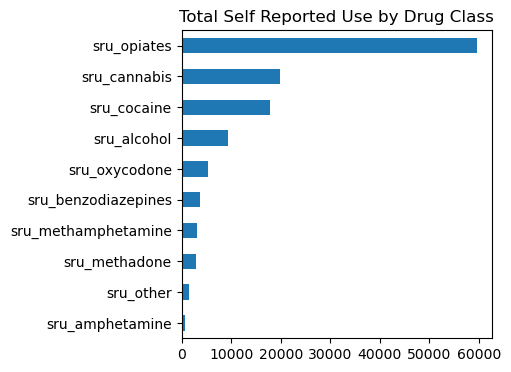

In [27]:
# show sum of self reported use of each drug by class
display(sru_monthly.sum().sort_values(ascending=True))

sru_monthly.sum().sort_values(ascending=True).plot(kind='barh',figsize=(4,4), 
title='Total Self Reported Use by Drug Class');


In [28]:
# agregating visit by count - essentially counting how many entries for self reported use
# add row to first position of sum_dict for 'VISIT':'count' as first entry in dict
sum_dict = {'VISIT':'count', **sum_dict}

In [29]:
sru_agg = s.groupby('patdeid').agg(sum_dict)

display(sru_agg.shape) # show shape and head of df
sru_agg[:5]

(1668, 11)

,VISIT,sru_alcohol,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_methadone,sru_oxycodone,sru_other
patdeid,,,,,,,,,,,
1,34,0.0,2.0,0.0,0.0,2.0,30.0,0.0,0.0,0.0,0.0
2,67,0.0,7.0,2.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0
3,237,40.0,0.0,54.0,0.0,1.0,220.0,8.0,0.0,0.0,0.0
4,106,2.0,7.0,14.0,0.0,0.0,81.0,14.0,0.0,1.0,0.0
6,30,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,25.0,0.0


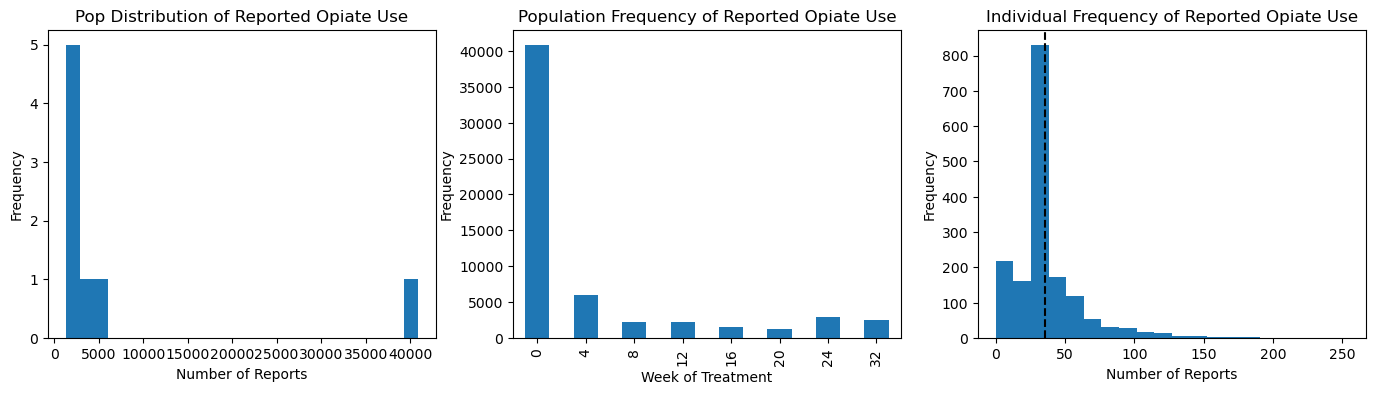

In [30]:
# create two plots to show distribution and monthly frequency of reported opiate use
fig, ax = plt.subplots(1,3, figsize=(17,4))
sru_monthly.sru_opiates.hist(bins=25,grid=False, ax=ax[0]);
sru_monthly.loc[:,['sru_opiates']].plot(kind='bar', legend=False, ax=ax[1]);
sru_agg.sru_opiates.plot(kind='hist', bins=20, grid=False, ax=ax[2]);
ax[0].set_title('Pop Distribution of Reported Opiate Use');
ax[1].set_title('Population Frequency of Reported Opiate Use');
ax[0].set_xlabel('Number of Reports');
ax[1].set_xlabel('Week of Treatment');
ax[0].set_ylabel('Frequency');
ax[1].set_ylabel('Frequency');
ax[2].set_title('Individual Frequency of Reported Opiate Use');
ax[2].set_xlabel('Number of Reports');
ax[2].axvline(sru_agg.sru_opiates.mean(), color='black', linestyle='--', label='Mean');
ax[2].set_ylabel('Frequency');

In [31]:
sru_agg.reset_index(inplace=True)

In [34]:
display(sru_agg.shape)
sru_agg[:5]

(1668, 12)

,patdeid,VISIT,sru_alcohol,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_methadone,sru_oxycodone,sru_other
0,1,34,0.0,2.0,0.0,0.0,2.0,30.0,0.0,0.0,0.0,0.0
1,2,67,0.0,7.0,2.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0
2,3,237,40.0,0.0,54.0,0.0,1.0,220.0,8.0,0.0,0.0,0.0
3,4,106,2.0,7.0,14.0,0.0,0.0,81.0,14.0,0.0,1.0,0.0
4,6,30,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,25.0,0.0


In [35]:
sru_agg.columns.values[1] = 'sru_count'

In [36]:
sru_agg[:5]

,patdeid,sru_count,sru_alcohol,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_methadone,sru_oxycodone,sru_other
0,1,34,0.0,2.0,0.0,0.0,2.0,30.0,0.0,0.0,0.0,0.0
1,2,67,0.0,7.0,2.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0
2,3,237,40.0,0.0,54.0,0.0,1.0,220.0,8.0,0.0,0.0,0.0
3,4,106,2.0,7.0,14.0,0.0,0.0,81.0,14.0,0.0,1.0,0.0
4,6,30,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,25.0,0.0


In [43]:
# show keys for sru_agg
sru_agg.shape


(1668, 12)

In [45]:
sru_agg.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/sru_agg.csv', index=False)

### We must reshape the data, each patient has 60 rows on average, which represent an instance of self reported use.  We must consolidate and reshape the dataframe so that ea patient has 1 row with all their instances of self reported use

### Steps to aggregate and reshape 
1.  Use groupby to create multi-index for patdeid and VISIT, then agregate all tests by drug class
2.  Reset index to show 1 row row for each VISIT with aggregated instances of self reported use

In [ ]:
# example for patient 1, where they reported 30 instances of opiate use at the first 30 days
display(s.loc[s.patdeid==1].groupby(['patdeid','VISIT']).sum().sort_values(by='VISIT', ascending=True).shape)

s.loc[s.patdeid==1].groupby(['patdeid','VISIT']).sum().sort_values(by='VISIT', ascending=True)

In [ ]:
# create new df with multi index to aggregate results per patient by visit week
sru_agg = s.groupby(['patdeid','VISIT']).sum().sort_values(by='VISIT', ascending=True)

display(sru_agg.shape)
sru_agg[:5]

In [ ]:
# remove multi index to flatten dataframe and sort values appropriately
sru_agg = sru_agg.sort_values(by=['patdeid','VISIT'],ascending=[True,True]).reset_index()

display(sru_agg.shape)
sru_agg[:5]

Now that the data frame is reshaped from 100,000 rows to about 6,000, we now have to bin the values, as they will create too many erroneous variables in current state.  

Each column has a high level of 0.0 values, for no substance use reported, we will create 3 other values, for average, below average and above average reporting, for ea drug class

In [ ]:
# create function that takes df and column as input
# returns 3 values: unique values, mean, and descriptive stats for min, max, and 50%
def column_review(df, col):
    print(f'Number of unique values in {col}: {df[col].unique().size}')
    print('\n')
    print(f'Average value for {col}: {df[col].unique().mean().round(2)}')
    display(df[col].describe()[['min','max','50%']])

In [ ]:
# create function that takes df, column and mean int as input
# returns column with values mapped to 'none_reported' if 0.0, 'average' if == mean, 'above_average' if > mean, else: 'below_average'
def map_values(df, column, mean):
    df[column] = df[column].map(lambda x: 'none_reported' if x == 0.0 else 'mean' if x == mean else 'above_mean' if x > mean else 'below_mean')
    return df[column].value_counts()

In [ ]:
# review alcohol column
column_review(sru_agg, 'sru_alcohol')

In [ ]:
# map values for alcohol column
map_values(sru_agg, 'sru_alcohol', 25)

In [ ]:
# review cannabis column
column_review(sru_agg, 'sru_cannabis')

In [ ]:
# map values for cannabis column
map_values(sru_agg, 'sru_cannabis', 27)

In [ ]:
# review cocaine column
column_review(sru_agg, 'sru_cocaine')

In [ ]:
# map values for cocaine column
map_values(sru_agg, 'sru_cocaine', 27)

In [ ]:
# review amphetamine column
column_review(sru_agg, 'sru_amphetamine')

In [ ]:
# map values for amphetamine column
map_values(sru_agg, 'sru_amphetamine', 13)

In [ ]:
# review methamphetamine column
column_review(sru_agg, 'sru_methamphetamine')

In [ ]:
# map values for methamphetamine column
map_values(sru_agg, 'sru_methamphetamine', 16)

In [ ]:
# review opiates column
column_review(sru_agg, 'sru_opiates')

In [ ]:
# map values for opiates column
map_values(sru_agg, 'sru_opiates', 30)

In [ ]:
# review benzodiazepines column
column_review(sru_agg, 'sru_benzodiazepines')

In [ ]:
# map values for benzodiazepines column
map_values(sru_agg, 'sru_benzodiazepines', 19)

In [ ]:
# review methadone column
column_review(sru_agg, 'sru_methadone')

In [ ]:
# map values for methadone column
map_values(sru_agg, 'sru_methadone', 15)

In [ ]:
# review oxycodone column
column_review(sru_agg, 'sru_oxycodone')

In [ ]:
# map values for oxycodone column
map_values(sru_agg, 'sru_oxycodone', 17)

In [ ]:
# review other column
column_review(sru_agg, 'sru_other')

In [ ]:
# map values for other column
map_values(sru_agg, 'sru_other', 15)

In [ ]:
display(sru_agg.shape)
sru_agg[:5]

### now we will have to flatten the DF to 1 row per patient.  We will combine VISIT data with reported use for one hot encoding

In [ ]:
sru_agg.info()

In [ ]:
sru_agg[:5]

In [ ]:
# combine data from VISIT column with columns except for patdeid and VISIT
for col in sru_agg.columns:
    if col not in ['patdeid','VISIT']:
        sru_agg[col] = sru_agg.VISIT.astype(str) + '_' + sru_agg[col].astype(str) 

In [ ]:
sru_agg[:5]

In [ ]:
# drop VISIT column
sru_agg.drop(columns='VISIT', inplace=True)

# one hot encode columns from sru_alcohol:sru_other
sru_agg = pd.get_dummies(sru_agg, columns=sru_agg.columns[1:], dtype=np.int64)

In [ ]:
sru_agg = sru_agg.drop_duplicates(subset=['patdeid']).reset_index(drop=True)

In [ ]:
sru_agg.shape

In [ ]:
sru_agg.info(verbose=True)

In [ ]:
sru_agg[:5]

In [ ]:
# create df that includes patdeid column and remove columns that don't contain 0,4,8,12,16,20,24
sru_agg = sru_agg.loc[:,sru_agg.columns.str.contains('patdeid|0|4|8|12|16|20|24')]

In [ ]:
sru_agg.info(verbose=True)

In [ ]:
sru_agg.shape

### data has been properly aggregated and values were mapped into 4 distinct classes, data is now ready for machine learning and merging with other datasets

In [ ]:
# save dataframe to csv for merge with other dataframes
sru_agg.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/sru_agg.csv', index=False)